In [44]:
#import library
import numpy as np
import pandas as pd
from datetime import date
from neupy import algorithms
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import keras
from keras import regularizers
import pyrenn as prn
from keras.callbacks import EarlyStopping
from scipy import optimize
from scipy.misc import derivative

In [10]:
#count day after planting
def countDaysAfterPlanting(date_planted, date_key):
#     print(date_planted, date_key)
#     print(date_planting, date_key)
    f_date = date(2016, int(date_planted[:2]), int(date_planted[2:4]))
    l_date = ''.join(s for s in date_key if s.isdigit())
    #print(int('20'+l_date[:2]), int(l_date[2:4]), int(l_date[4:6]))
    l_date = date(2016, int(l_date[:2]), int(l_date[2:4]))
    return((l_date-f_date).days +1)

In [15]:
def sigmoid(x, a, b, c):
     y = a / (1 + np.exp(-(x-c)/b))
     return y

In [156]:
# file_parameters = ['ch', 'cv', 'ExG', 'NDVI']
file_parameters = ['ch', 'cv']
plant_date = '0401'
limit_day = 107
interval_day = 7
x_pred = range(interval_day, limit_day+1, interval_day)
path = '2016_spring/2016_spring{}.csv'
yield_path = '2016_spring/2016_spring.csv'
observations = range(10)

In [157]:
parameter = 'ch'
parameter_data = pd.read_csv(path.format('_'+parameter))

In [173]:
def show_sigmoid(observation):
    data = parameter_data.copy()
    date_keys = data.columns
    x = np.array([countDaysAfterPlanting(plant_date, date_key) for date_key in date_keys])
    mask = x <=limit_day
    y = data.loc[observation].values
#     mask = mask & (y>0)
    x = x[mask]
    y = y[mask]
    print(len(x))
    params, params_covariance = optimize.curve_fit(sigmoid, x, y)
    a,b,c = params
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
    ax.scatter(x, y, color = 'blue', label = 'CH value')
    ax.plot(x, sigmoid(x, a, b,c), color = 'red', label = 'sigmoid predict', alpha = 0.8)
    ax.set_xlabel('days after planting')
    ax.set_ylabel('values')

    ax.legend(loc = 'upper left' )

    plt.show()

19


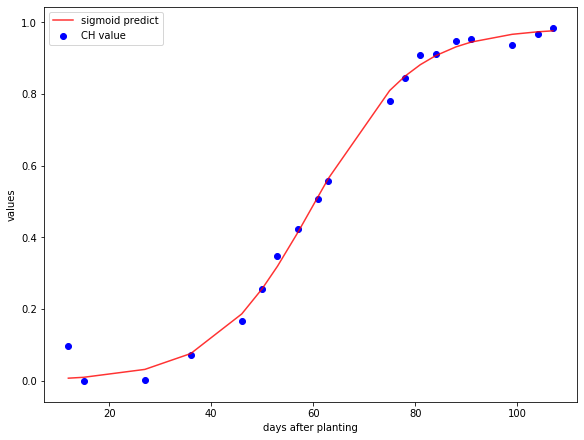

19


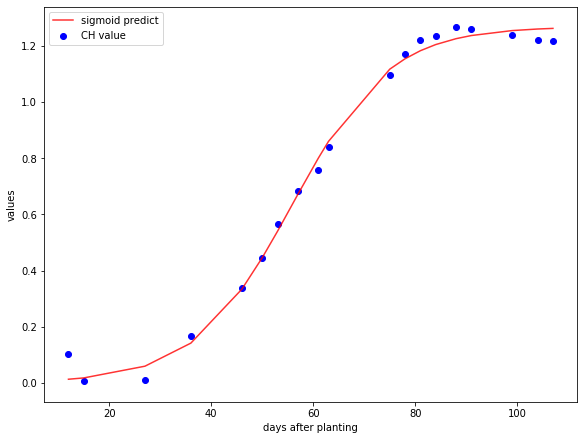

19


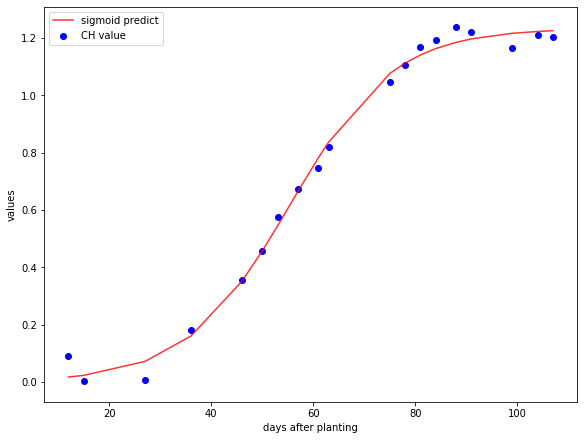

18


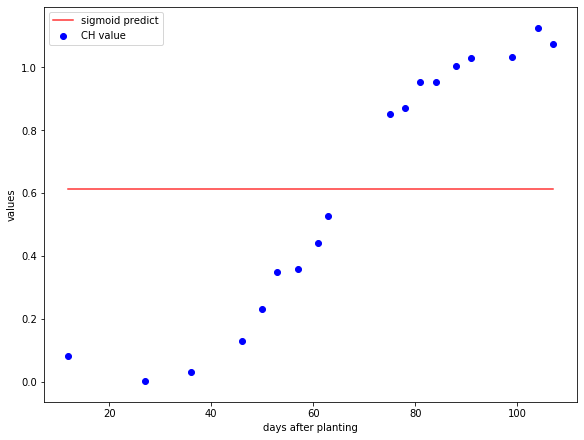

18


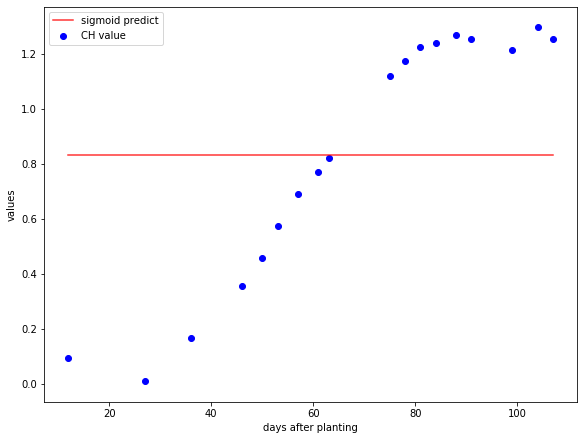

19


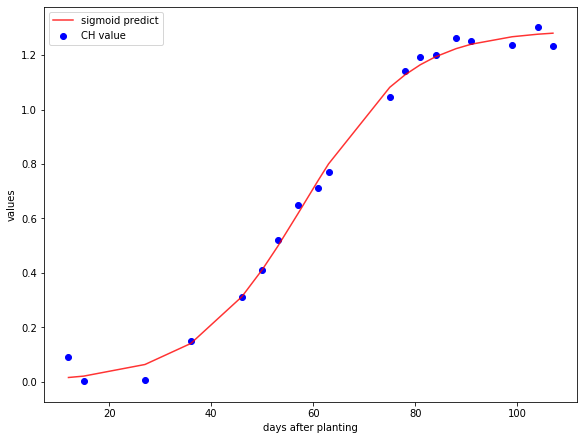

19


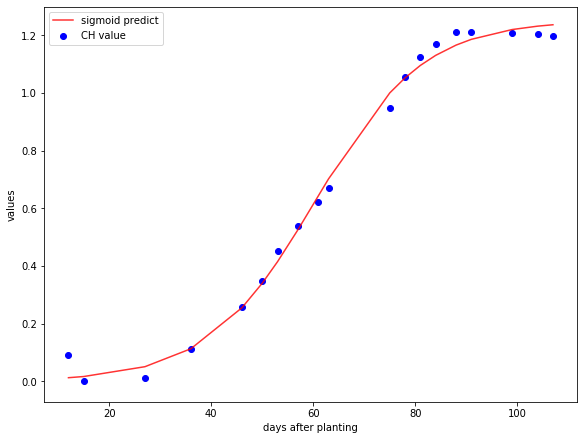

18


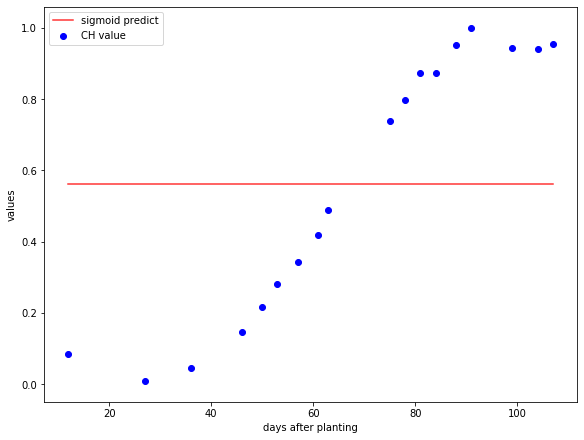

18


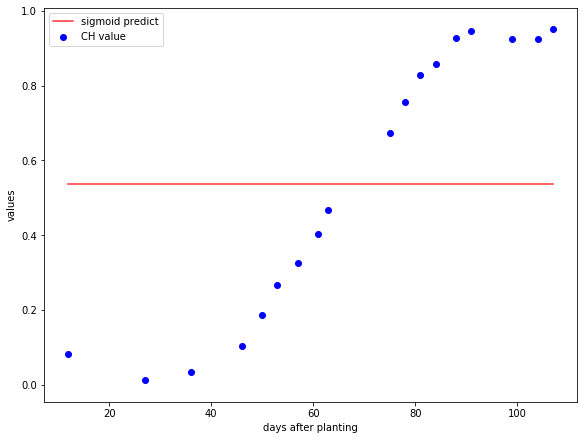

19


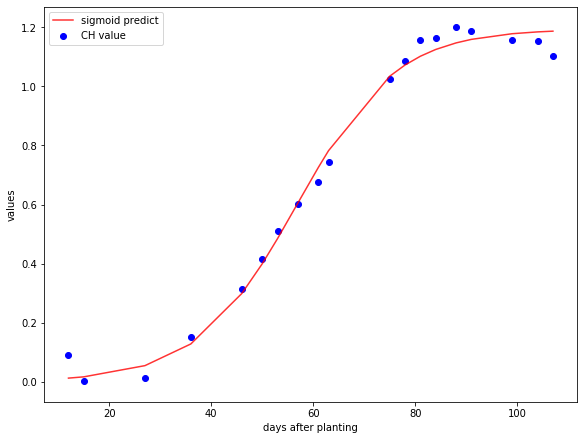

In [172]:
for observation in range(10):
    show_sigmoid(observation +15)

19


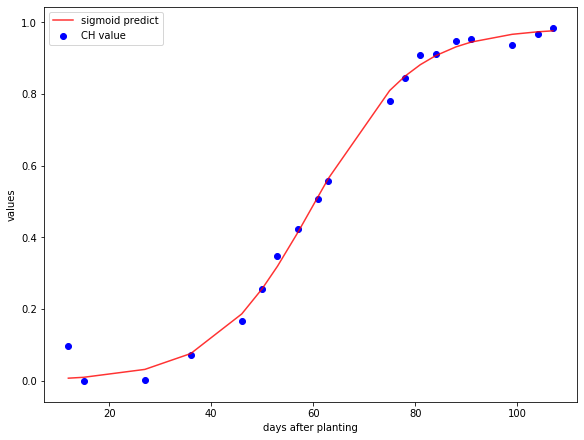

19


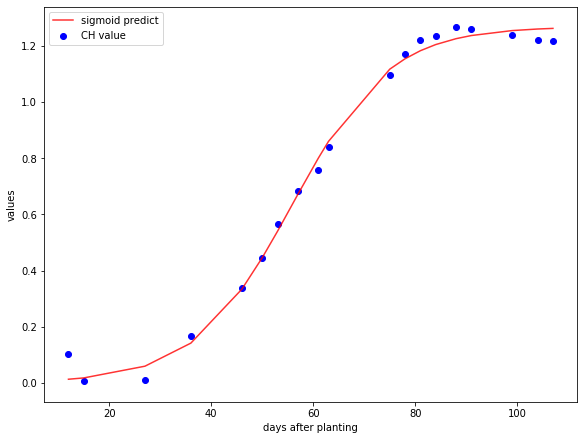

19


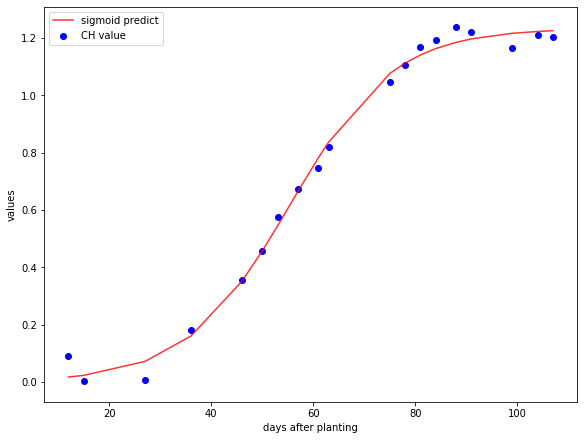

19


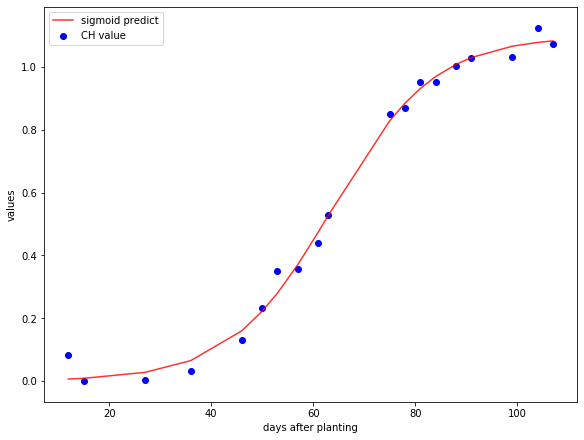

19


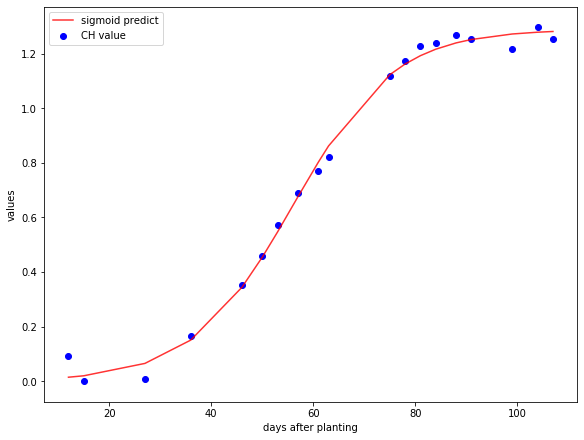

19


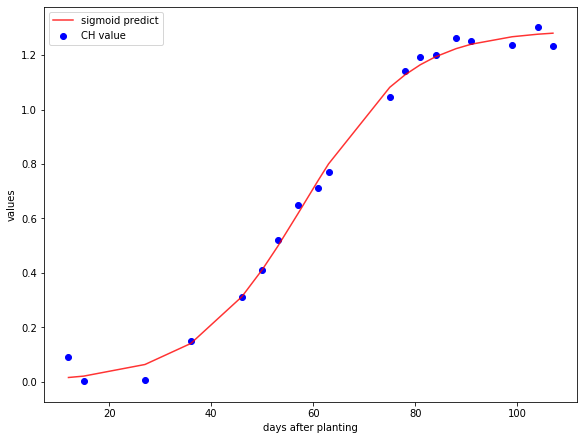

19


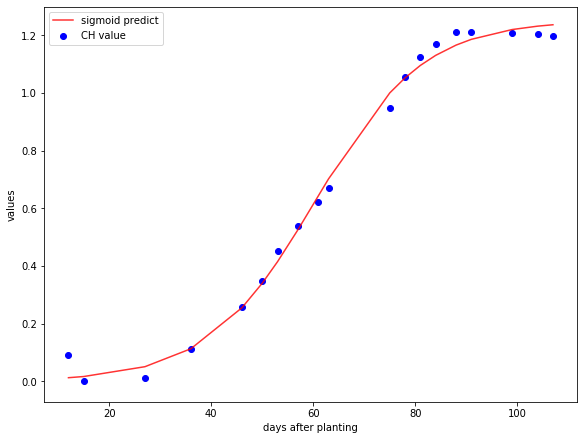

19


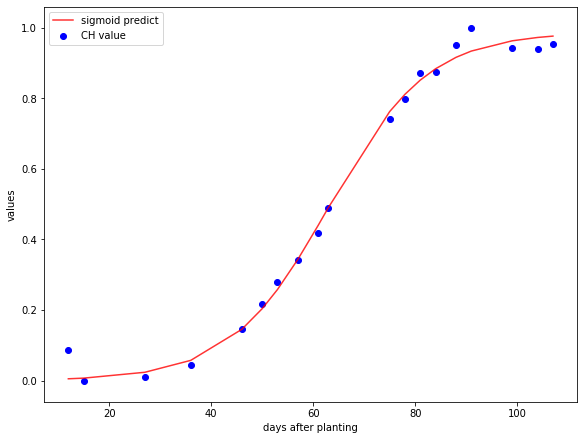

19


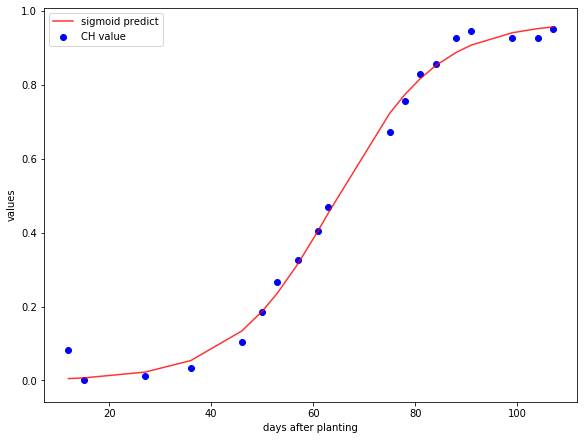

19


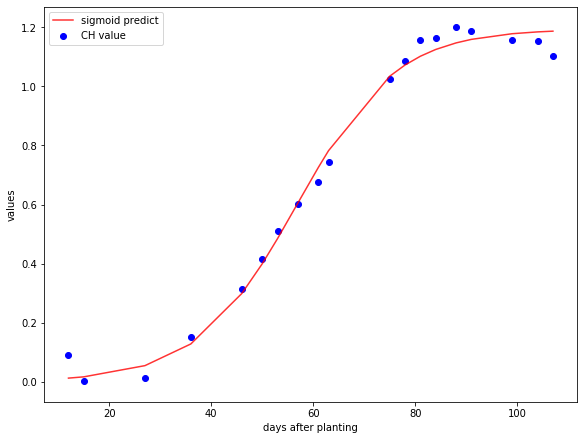

In [174]:
for observation in range(10):
    show_sigmoid(observation +15)

In [159]:
def show_growth_rate(observation):
    data = parameter_data.copy()
    date_keys = data.columns
    x = np.array([countDaysAfterPlanting(plant_date, date_key) for date_key in date_keys])
    mask = x <=limit_day
    y = data.loc[observation].values
    x = x[mask]
    y = y[mask]
    print(x)
    params, params_covariance = optimize.curve_fit(sigmoid, x, y)
    a,b,c = params
    def preSigmoid(x):
        return sigmoid(x, a, b, c)

    growth_rate = [derivative(preSigmoid, date, dx=1e-6) for date in x]
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
    # ax.scatter(x, y, color = 'blue', label = 'CH value')
    ax.plot(x, growth_rate, color = 'red', label = 'growth rate', alpha = 0.8)
    ax.set_xlabel('days after planting')
    ax.set_ylabel('values')

    ax.legend(loc = 'upper left' )

    plt.show()

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]


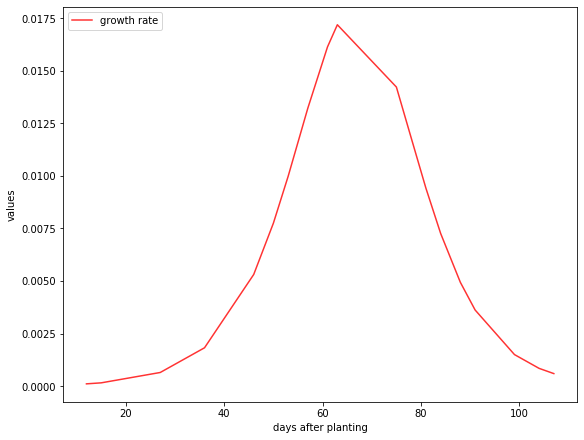

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]


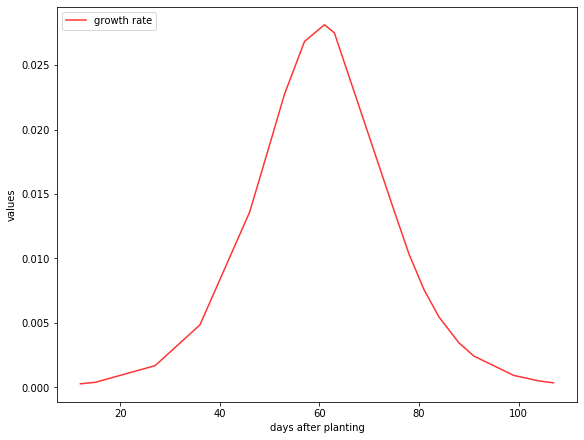

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]


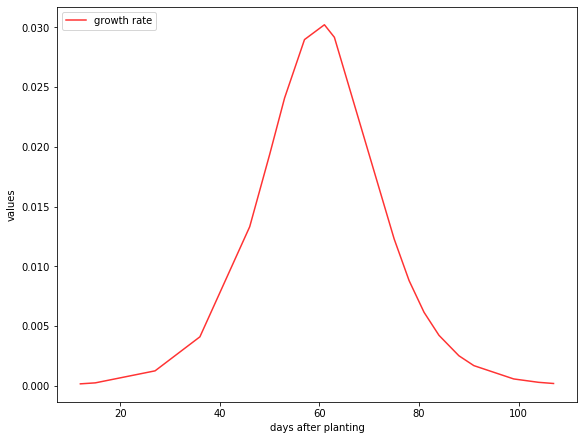

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]


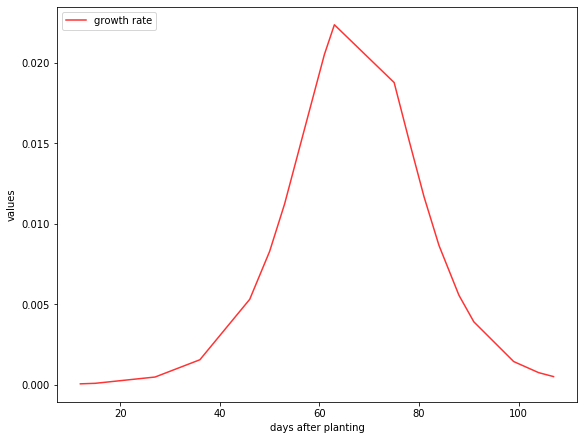

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]


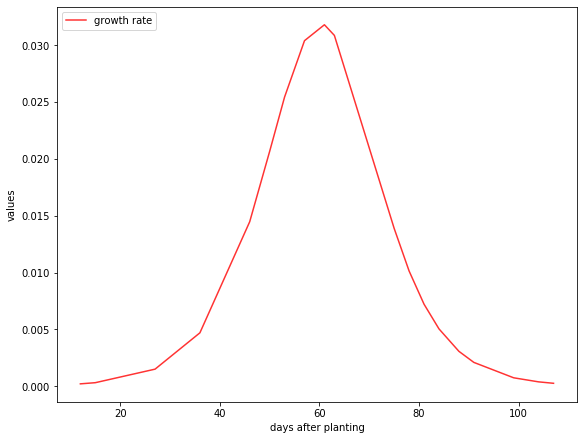

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]


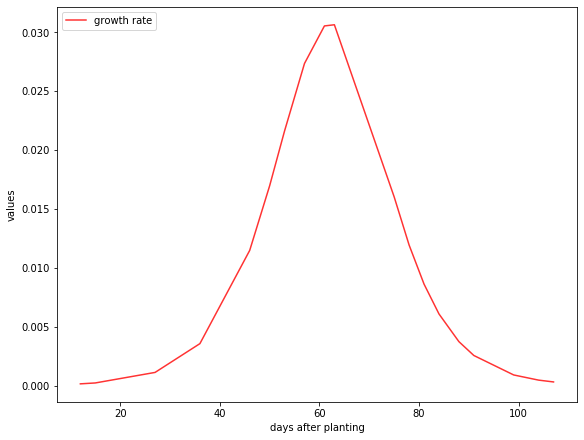

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]


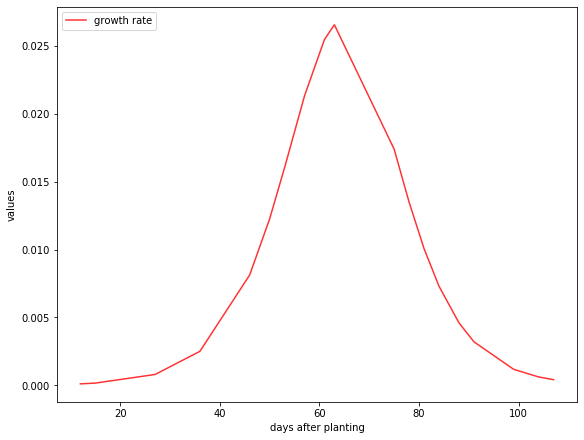

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]


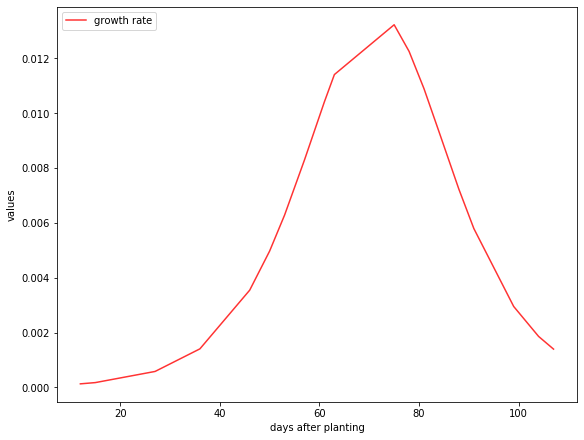

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]


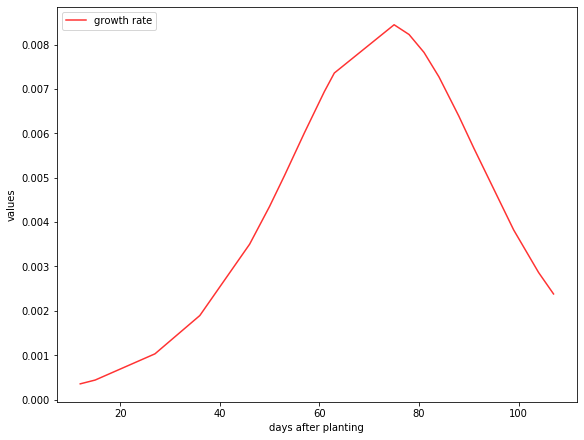

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]


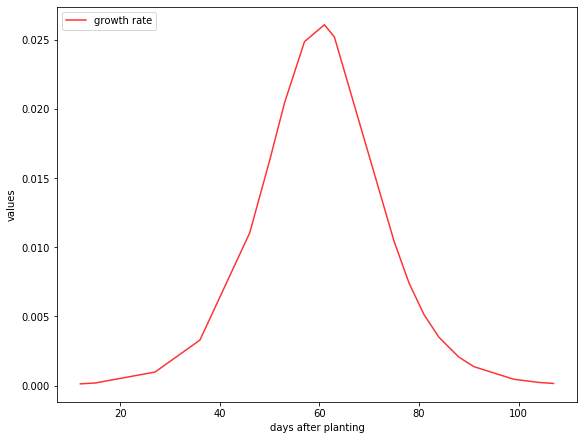

In [151]:
for observation in range(10):
    show_growth_rate(observation +15)

In [160]:
def findNearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [167]:
def show_smooth_growth_rate(observation):
    data = parameter_data.copy()
    date_keys = data.columns
    x = np.array([countDaysAfterPlanting(plant_date, date_key) for date_key in date_keys])
    mask = x <=limit_day
    
    y = data.loc[observation].values
    mask = mask & (y>0)
    x = x[mask]
    print(x)
    y = y[mask]

    params, params_covariance = optimize.curve_fit(sigmoid, x, y)
    a,b,c = params
    def preSigmoid(x):
        return sigmoid(x, a, b, c)

    growth_rate = np.array([derivative(preSigmoid, date+1, dx=1e-6) for date in range(limit_day)])
    all_days = np.array(range(limit_day))+1
    max_y = max(growth_rate)  # Find the maximum y value
    max_x = all_days[growth_rate.argmax()]  # Find the x value corresponding to the maximum y value
    print(observation)
    print (max_x, max_y)
    
    max_half_y = (max(growth_rate)-min(growth_rate))/2 + min(growth_rate)
    
    first_half_growth_rate = growth_rate[:max_x]
    second_half_growth_rate = growth_rate[max_x:]
    first_max_half_x = findNearest(first_half_growth_rate, max_half_y)
    second_max_half_x = findNearest(second_half_growth_rate, max_half_y) + len(first_half_growth_rate)

    print(growth_rate[first_max_half_x], growth_rate[second_max_half_x])
    print(first_max_half_x, second_max_half_x)
    print(max_half_y)
    
    fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
    # ax.scatter(x, y, color = 'blue', label = 'CH value')
    ax.plot(all_days, growth_rate, color = 'red', label = 'growth rate', alpha = 0.8)
    ax.scatter(max_x, max_y, color ='blue')
    ax.scatter(first_max_half_x+1, growth_rate[first_max_half_x], color = 'black', label = 'half_max')
    ax.scatter(second_max_half_x+1, growth_rate[second_max_half_x], color = 'black', label = 'half_max')
    ax.set_xlabel('days after planting')
    ax.set_ylabel('values')

    ax.legend(loc = 'upper left' )
    plt.show()





[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]
15
60 0.0253532018434921
0.012661841353178716 0.012866772869379872
42 76
0.012790332289060354


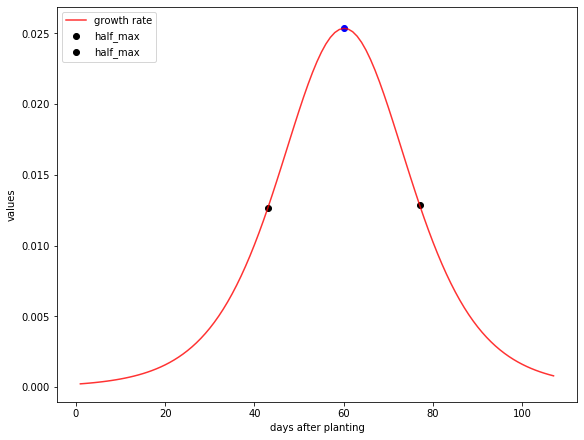

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]
16
56 0.03312776475361545
0.016573333039282545 0.01624331358307529
38 72
0.016777158653004734


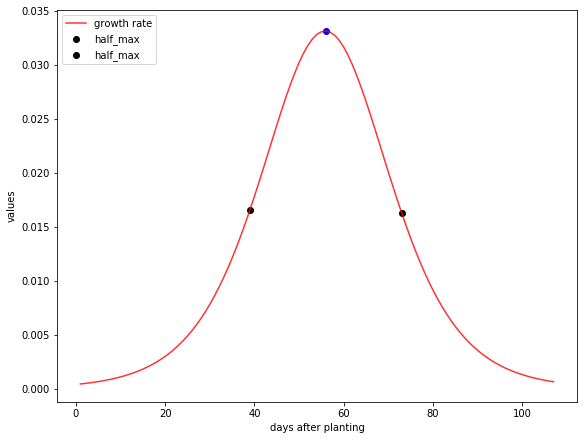

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]
17
55 0.03024702355247655
0.015725117472054073 0.015512816142759789
37 72
0.015411393143203653


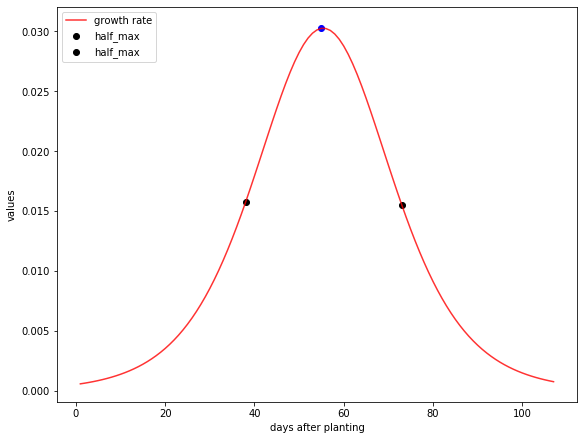

[ 12  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104 107]
18
2 0.0
-5.551115123125783e-11 -5.551115123125783e-11
0 3
-5.551115123125783e-11


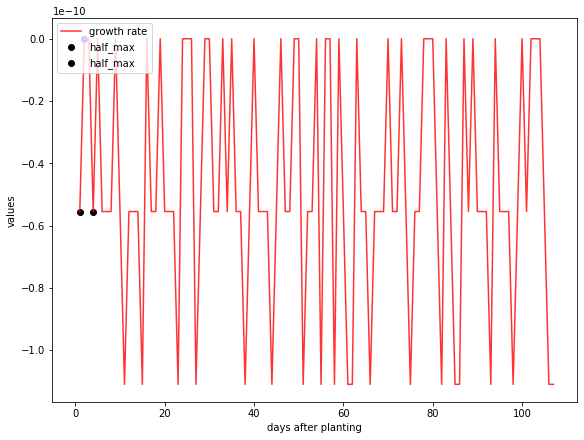

[ 12  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104 107]
19
1 0.0
0.0 0.0
0 1
0.0


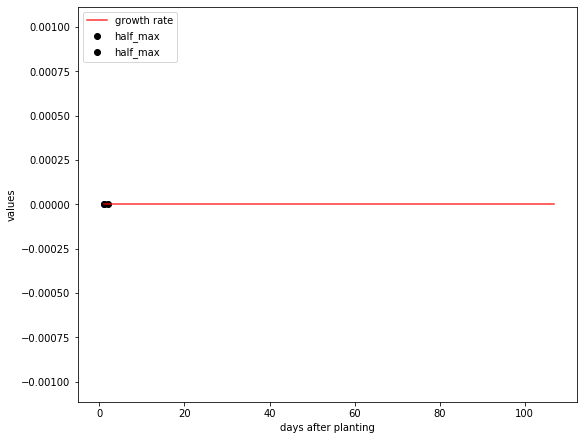

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]
20
58 0.030963855923715755
0.01597394409802444 0.0158113283577066
39 75
0.015743960814088367


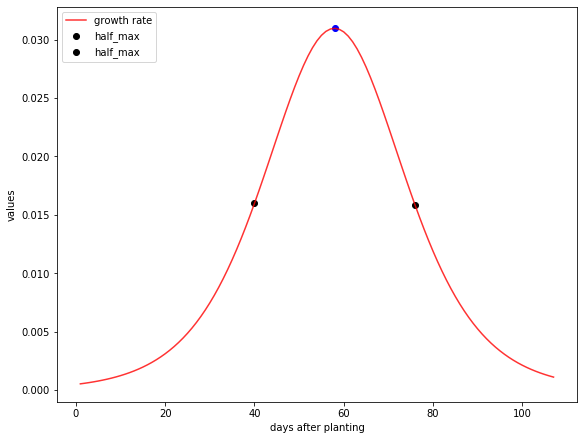

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]
21
60 0.02958438949374198
0.015017143153994716 0.014833528627633541
41 78
0.015004869294331716


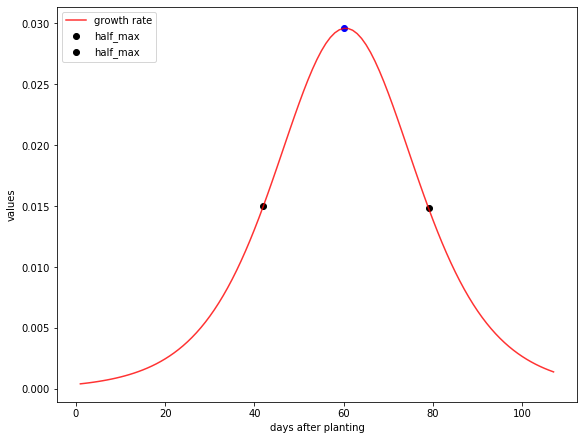

[ 12  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104 107]
22
1 0.0
0.0 0.0
0 1
0.0


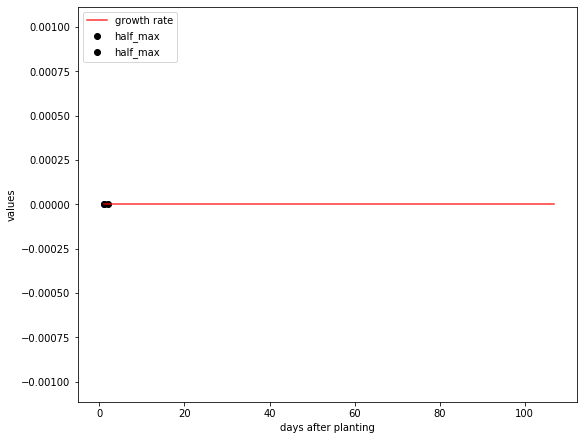

[ 12  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104 107]
23
1 0.0
0.0 0.0
0 1
0.0


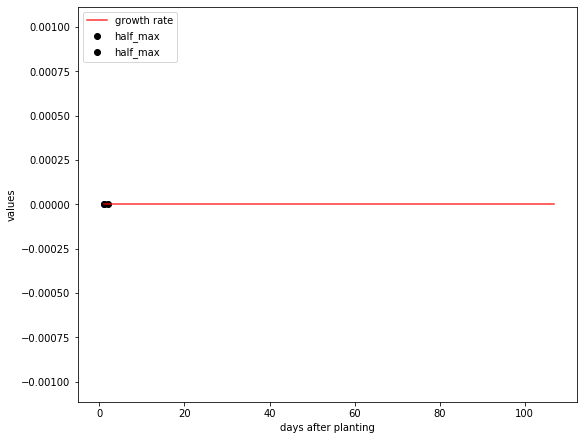

[ 12  15  27  36  46  50  53  57  61  63  75  78  81  84  88  91  99 104
 107]
24
57 0.03053847907885654
0.01583485459422107 0.015212435200417929
39 73
0.015471834248232536


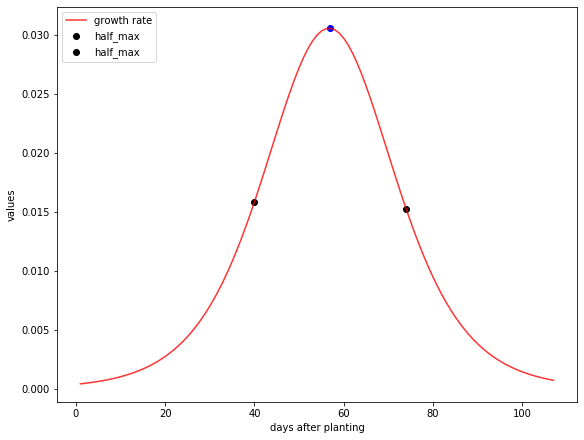

In [168]:
for observation in range(10):
    show_smooth_growth_rate(observation +15)

In [147]:
def sigmoidProcess(data, data_keys):
    y = data
    x = data_keys
    params, params_covariance = optimize.curve_fit(sigmoid, x, y)
    a,b,c = params
    def preSigmoid(x):
        return sigmoid(x, a, b, c)

    growth_rate = np.array([derivative(preSigmoid, date+1, dx=1e-6) for date in range(limit_day)])
    all_days = np.array(range(limit_day))+1
    max_y = max(growth_rate)  # Find the maximum y value
    max_x = all_days[growth_rate.argmax()]  # Find the x value corresponding to the maximum y value
#     print (max_x, max_y)
    
    max_half_y = (max(growth_rate)-min(growth_rate))/2 + min(growth_rate)
    
    first_half_growth_rate = growth_rate[:max_x]
    second_half_growth_rate = growth_rate[max_x:]
    first_max_half_x = findNearest(first_half_growth_rate, max_half_y)
    second_max_half_x = findNearest(second_half_growth_rate, max_half_y) + len(first_half_growth_rate)

#     print(growth_rate[first_max_half_x], growth_rate[second_max_half_x])
#     print(max_half_y)
    
    return(sigmoid(limit_day, a,b,c), max(growth_rate), max_half_y, first_max_half_x+1, second_max_half_x+1, second_max_half_x - first_max_half_x +1)
    
#     fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
#     # ax.scatter(x, y, color = 'blue', label = 'CH value')
#     ax.plot(all_days, growth_rate, color = 'red', label = 'growth rate', alpha = 0.8)
#     ax.scatter(max_x, max_y, color ='blue')
#     ax.scatter(first_max_half_x+1, growth_rate[first_max_half_x], color = 'black', label = 'half_max')
#     ax.scatter(second_max_half_x+1, growth_rate[second_max_half_x], color = 'black', label = 'half_max')
#     ax.set_xlabel('days after planting')
#     ax.set_ylabel('values')

#     ax.legend(loc = 'upper left' )
#     plt.show()





In [176]:
for (i, parameter) in enumerate(file_parameters):
#     print(type(data[parameter]))
    parameter_data = pd.read_csv(path.format('_'+parameter))
    interval_process_data = np.empty([len(parameter_data), 0])
    date_keys = parameter_data.columns
    interval_process_parameter_data = np.empty([0, 6])
    for row in range(len(parameter_data)):      
#         print(row)
        row_data = parameter_data.loc[row].values
        days_after_planting = np.array([countDaysAfterPlanting(plant_date, date_key) for date_key in date_keys])
        mask = days_after_planting <=limit_day
#         if parameter != 'ExG':
# #             print(len(days_after_planting))
# #             print(len(mask))
#             mask = (row_data>0) & mask
        row_data = row_data[mask]
        days_after_planting = days_after_planting[mask]
        sigmoid_data =np.array(sigmoidProcess(row_data, days_after_planting))
        sigmoid_data = sigmoid_data.reshape((1,len(sigmoid_data)))
#         print(interval_process_parameter_data.shape)
#         print(sigmoid_data.shape)
        interval_process_parameter_data = np.append(interval_process_parameter_data, sigmoid_data, axis = 0)
    interval_process_data = np.append(interval_process_data, interval_process_parameter_data, axis = 1)
    df = pd.DataFrame(data=interval_process_data, columns=["max_value", "max_growth_rate", "half_max_growth_rate", "first_day_half_max", "second_day_half_max", "duration_half_max"])
    print(interval_process_data.shape)
    path_save = 'sigmoid_2016_spring/sigmoid_2016_spring_'+parameter+'.csv'
    df.to_csv(path_save, index=False, header=True)


(802, 6)
(802, 6)


In [123]:
a = np.array([[4, 1, 2, 3, 4, 5], [1,2,3,4, 5,6]], dtype = float)
a[:, :3] /= np.linalg.norm(a[:, :3])
a[:, 4:] /= np.linalg.norm(a[:, 4:])
b = a[:3]
a

array([[0.6761234 , 0.16903085, 0.3380617 , 3.        , 0.39605902,
        0.49507377],
       [0.16903085, 0.3380617 , 0.50709255, 4.        , 0.49507377,
        0.59408853]])

In [131]:
a = np.array((1,2,3))
b = np.array([1,2,3])
a = a.reshape(1,len(a))
print(a.shape)
print(b.shape)

(1, 3)
(3,)


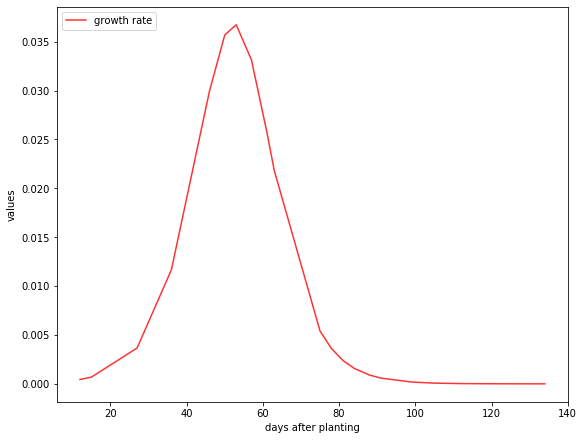

In [57]:
def sigmoid_value(x):
    return 1.0284563698247138 / (1 + np.exp(-(x-52.44109397536332)/6.989365200861282))
observation = 4
data = parameter_data.copy()
date_keys = data.columns
x = np.array([countDaysAfterPlanting(plant_date, date_key) for date_key in date_keys])
growth_rate_second = [derivative(sigmoid_value, date, dx=1e-6) for date in x]
fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 6))
# ax.scatter(x, y, color = 'blue', label = 'CH value')
ax.plot(x, growth_rate_second, color = 'red', label = 'growth rate', alpha = 0.8)
ax.set_xlabel('days after planting')
ax.set_ylabel('values')

ax.legend(loc = 'upper left' )

plt.show()